In [1]:
from keras import models
from keras import layers
from keras import optimizers
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy

2024-05-09 18:04:47.818730: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Construct a model with Dropout layer

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dropout(0.5)) # Dropout 50% neurons

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2024-05-09 18:04:49.047546: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 18:04:49.065034: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 18:04:49.065540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Data prepare

Use image data generator read the image

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = r"/home/t1102/Desktop/CCW/Keras practice/kaggle_dataset/cats_and_dogs_small/train"
validation_dir = r"/home/t1102/Desktop/CCW/Keras practice/kaggle_dataset/cats_and_dogs_small/validation"
test_dir = r"/home/t1102/Desktop/CCW/Keras practice/kaggle_dataset/cats_and_dogs_small/test"

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), 
                                                      batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Use image data generator augment the data

In [5]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')

Show some data ramdonly

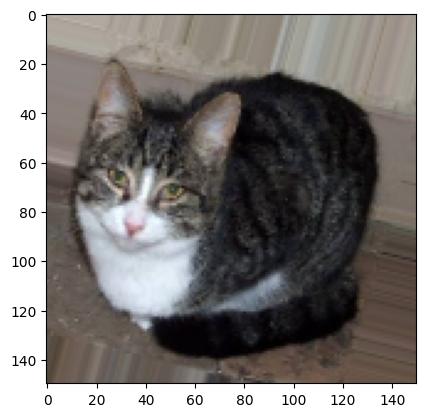

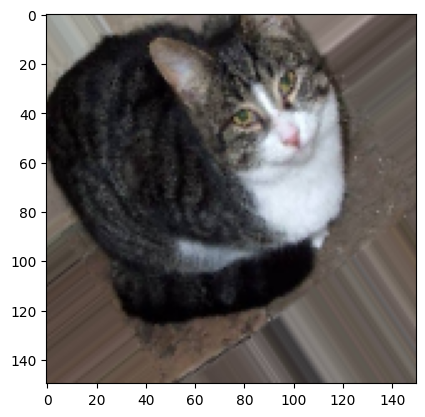

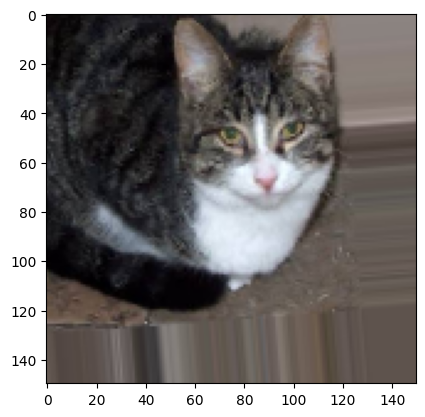

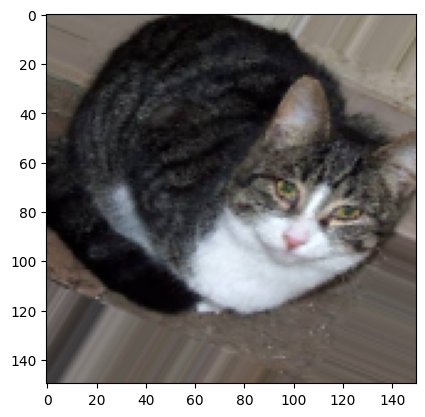

In [12]:
from keras.preprocessing import image

train_cats_dir = r"/home/t1102/Desktop/CCW/Keras practice/kaggle_dataset/cats_and_dogs_small/train/cats"
frames = [os.path.join(train_cats_dir, frame) for frame in os.listdir(train_cats_dir)]
img_path = frames[168]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

train the model

In [7]:
history = model.fit(train_generator, steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100


2024-05-09 18:04:51.194814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8901
2024-05-09 18:04:51.328970: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-09 18:04:51.579174: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x31e73530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-09 18:04:51.579194: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-05-09 18:04:51.582820: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-09 18:04:51.623565: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-09 18:04:51.654790: I ./tensorflow/compiler/jit/device_co

100/100 [==============================] - 11s 84ms/step - loss: 0.6928 - acc: 0.5130 - val_loss: 0.6873 - val_acc: 0.5220
Epoch 2/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6861 - acc: 0.5470 - val_loss: 0.6865 - val_acc: 0.5120
Epoch 3/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6770 - acc: 0.5675 - val_loss: 0.6581 - val_acc: 0.6040
Epoch 4/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6674 - acc: 0.5895 - val_loss: 0.6469 - val_acc: 0.6180
Epoch 5/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6622 - acc: 0.6075 - val_loss: 0.6475 - val_acc: 0.6090
Epoch 6/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6601 - acc: 0.6080 - val_loss: 0.6430 - val_acc: 0.6120
Epoch 7/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6461 - acc: 0.6135 - val_loss: 0.6597 - val_acc: 0.5980
Epoch 8/100
100/100 [==============================] - 8s 78ms/step - los

Save the model

In [8]:
model.save('cats_and_dogs_small_data_aug.keras')

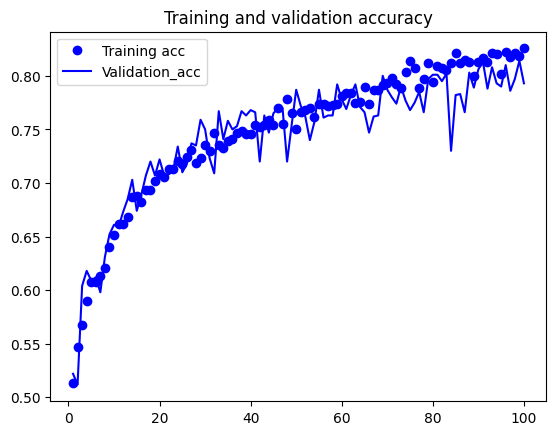

In [9]:


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()